## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

###  Домашнее задание №3. Обработка текстов. Линейная классификация.

Задание выполнил(а): Ханаев Антон

### Общая информация
__Дата выдачи:__ 28.04.2019

__Дедлайн:__ 23:59 12.05.2019

### Оценивание и штрафы

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи
__Стирать условия нельзя!__

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_03_Фамилия_Имя.ipynb

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

В задании вам предоставлены реальные текстовые данные. 

Необходимо построить алгоритм, который будет по тексту документа определять тип источника:
 - Микроблоги
 - Новости
 - Отзывы
 - Форумы
 - Блоги
 - Видео
 - Мессенджеры

## Часть 1. Работа с текстовыми данными

 ### 1. Исследование данных

[2 балла]

Скачаем данные отсюда:
https://yadi.sk/d/o3cPgFAq5gALiw

In [2]:
D = pd.read_csv('texts_dataset.csv', sep=';', index_col=0)

/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
D.head()

,Дата,ID сообщения,Заголовок,Текст,Дублей,Тип источника
0,27.04.2019 13:18,1396238,NaN,"-Здравствуйте, тинькофф банк\n-Мать твою ебал\...",1.0,Микроблоги
1,27.04.2019 13:15,1396239,NaN,Почему Немагия сделала обзор на Тинькова? #нем...,1.0,Микроблоги
2,27.04.2019 13:10,1396248,Forbes назвал самые экстравагантные инвестиции...,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 57 ...",2.0,Новости
3,27.04.2019 13:06,1396243,Forbes назвал самые экстравагантные инвестиции...,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 44 ...",2.0,Новости
4,27.04.2019 13:03,1396186,Тинькофф Страхование: Не купить полис без подп...,Первый отзыв без оценки:&nbsp;\nhttps://www.ba...,1.0,Отзывы


In [4]:
D['Текст'][0]

'-Здравствуйте, тинькофф банк\n-Мать твою ебал\n-Спасибо, досвидания'

Далее будем использовать лишь поля  "Текст", "Тип источника"

In [5]:
D = D[["Текст","Тип источника"]]

In [6]:
D.head()

,Текст,Тип источника
0,"-Здравствуйте, тинькофф банк\n-Мать твою ебал\...",Микроблоги
1,Почему Немагия сделала обзор на Тинькова? #нем...,Микроблоги
2,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 57 ...",Новости
3,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 44 ...",Новости
4,Первый отзыв без оценки:&nbsp;\nhttps://www.ba...,Отзывы


In [7]:
classes = D['Тип источника'].unique()
classes

array(['Микроблоги', 'Новости', 'Отзывы', 'Форумы', 'Блоги', 'Видео',
       'Мессенджеры', nan], dtype=object)

In [8]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200206 entries, 0 to 200205
Data columns (total 2 columns):
Текст            199578 non-null object
Тип источника    199993 non-null object
dtypes: object(2)
memory usage: 9.6+ MB


Удалим объекты с пропусками

In [9]:
D.dropna(axis = 0, inplace=True)

In [10]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199568 entries, 0 to 200205
Data columns (total 2 columns):
Текст            199568 non-null object
Тип источника    199568 non-null object
dtypes: object(2)
memory usage: 4.6+ MB


#### 1.1 Выведите среднюю длину текстов в каждом классе. Что можно сказать о данных? Что можно сказать о каждом классе?

In [11]:
classes = classes[:-1]
classes

array(['Микроблоги', 'Новости', 'Отзывы', 'Форумы', 'Блоги', 'Видео',
       'Мессенджеры'], dtype=object)

In [12]:
classes_mean_length = {}
for cl in classes:   
    mask = D['Тип источника'] == cl
    mean_length = np.sum(D[mask]['Текст'].str.len()) / D[mask].shape[0]
    classes_mean_length[cl] = mean_length

In [13]:
classes_mean_length

{'Микроблоги': 170.06141040462427,
 'Новости': 2602.3423206042803,
 'Отзывы': 550.4785651967005,
 'Форумы': 462.227363457533,
 'Блоги': 3490.84946848899,
 'Видео': 905.1847899159663,
 'Мессенджеры': 943.7823968821045}

### Получше взглянем на данные

In [14]:
D['Текст'][:5].values

array(['-Здравствуйте, тинькофф банк\n-Мать твою ебал\n-Спасибо, досвидания',
       'Почему Немагия сделала обзор на Тинькова? #немагия, тиньков, банк, интернет, блогеры https://t.co/MF5zzNuIPD',
       '13:01, 27.04.2019 \n\nПоделиться:\n\n  \n  57 \xa0 \n\n \nForbes назвал самые экстравагантные инвестиции богатых россиян\n\nБогатейшие бизнесмены России тратят деньги на покупки частных виноделен, устричных ферм, островов и коллекцию яиц Фаберже.\nЖурнал Forbes составил подборку «роскошных» необычных покупок, подарков и инвестиций богатейших россиян.\nВ этот список журнал включил, например, замок XVII века Aberuchill Castle на севере Шотландии, которым ранее владели представители одного из старейших кланов Шотландии — Кемпбеллы. Это имение приобрел миллиардер Владимир Лисин (состояние $21,3 млрд, по версии Forbes) в 2005 году. Цена замка — около $12 млн. Как отмечает издание, Лисин — страстный охотник и купил его ради обширных охотничьих угодий.\nГлава «Реновы» Виктор Вексельберг прио

#### Сразу в глаза бросаются следующие "особенности" данных:

1) Различен стиль текстов, то есть присутствуют и экземпляры, написанные в профессиональном стиле, так и в неформальном (даже имеют место быть маты)

2) В текстах много "escape" последовательностей (скорее всего результат парсинга сайтов)

3) Все записи связаны с банком Тинькофф

4) Много статистических и числовых данных и ссылок на различные ресурсы

### Микроблоги

In [15]:
microblogs = D[D['Тип источника'] == 'Микроблоги']
print('Amount of microblogs: {}'.format(microblogs.shape[0]))

Amount of microblogs: 21625


In [16]:
microblogs['Текст'][:10].values

array(['-Здравствуйте, тинькофф банк\n-Мать твою ебал\n-Спасибо, досвидания',
       'Почему Немагия сделала обзор на Тинькова? #немагия, тиньков, банк, интернет, блогеры https://t.co/MF5zzNuIPD',
       '«Яндекс» представил свою банковскую карту «Яндекс.Плюс» с кешбэком до 10%. /  / Обслуживанием занимаются «Альфа-Банк» или «Тинькофф Банк». Выпуск и обслуживание карты бесплатны. /  / Источник: Rozetked /  / #Яндекс@rndsc https://t.co/iYJ9f5AhtG',
       'Тинькофф Банк запустил для бизнеса сервис подбора недвижимости https://t.co/a6UOx92ags https://t.co/PmCwrg1PMS',
       'Почему Тинькофф банк стал опасен для клиентов https://t.co/elMBO1AOsS с помощью @YouTube',
       'RT @vcru: «Тинькофф Бизнес» запустил бесплатный сервис подбора недвижимости для предпринимателей. Клиенты банка могут подыскать свободное помещение в более чем 170 крупных городах России https://t.co/rCFE2Xb3QZ',
       '#банки: Как пополнить карту Тинькофф без комиссии? на https://t.co/3Lyrc0LCO9 - https://t.co/AIHBkx

В этом классе текст имеет наименьшую среднюю длину, здесь присутствуют смайлики, хэштеги и "at" signs

### Новости

In [17]:
news = D[D['Тип источника'] == 'Новости']
print('Amount of news: {}'.format(news.shape[0]))

Amount of news: 38128


In [18]:
news['Текст'][:10].values

array(['13:01, 27.04.2019 \n\nПоделиться:\n\n  \n  57 \xa0 \n\n \nForbes назвал самые экстравагантные инвестиции богатых россиян\n\nБогатейшие бизнесмены России тратят деньги на покупки частных виноделен, устричных ферм, островов и коллекцию яиц Фаберже.\nЖурнал Forbes составил подборку «роскошных» необычных покупок, подарков и инвестиций богатейших россиян.\nВ этот список журнал включил, например, замок XVII века Aberuchill Castle на севере Шотландии, которым ранее владели представители одного из старейших кланов Шотландии — Кемпбеллы. Это имение приобрел миллиардер Владимир Лисин (состояние $21,3 млрд, по версии Forbes) в 2005 году. Цена замка — около $12 млн. Как отмечает издание, Лисин — страстный охотник и купил его ради обширных охотничьих угодий.\nГлава «Реновы» Виктор Вексельберг приобрел крупнейшую в мире коллекцию ювелирных работ Фаберже из 200 предметов у наследников Малькольма Форбса, основателя журнала Forbes. Сумма сделки неизвестна. Эксперты Sotheby’s оценивали стоимость

Этот класс отличается длинным текстом и официальной стилистикой текста, наполненной различными фактами и статистическими значениями

### Отзывы

In [19]:
reviews = D[D['Тип источника'] == 'Отзывы']
print('Amount of reviews: {}'.format(reviews.shape[0]))

Amount of reviews: 50432


In [20]:
reviews['Текст'][:10].values

array(['Первый отзыв без оценки:&nbsp;\nhttps://www.banki.ru/insurance/responses/company/response/16876/\nКратко суть: не удается купить полис ОСАГО без того что-бы дать согласие на рассылку рекламы и запросы кредитной истории.&nbsp;\nПредставителем страховой был дан ответ:&nbsp;\n Если не желаете предоставлять данные с целью заключения с Банком универсального договора, выпуска, обслуживания банковских карт и создания информационных систем персональных данных Банка, то оформление полиса ОСАГО необходимо проводить на сайте страховой компании - www.tinkoffinsurance.ru.',
       'Общался сегодня в контакт-центре с девушкой, имеющий успокаивающий, приятный голос под рабочим номером 65227.&nbsp; &nbsp;Понимаю, что о себе много информации им предоставлять нельзя. Ну, а сотрудники банка сами её прекрасно знают. ))\n&nbsp; Хочу выразить благодарность за то, что приняла мою заявку по тратам определённой категории продуктов, по которой не начислили кэшбэк за прошлые месяцы. Там оказалось, что по

Класс отзывы имеет свободную стилистику текста и заметно варьирующуюся длину текста

### Форумы

In [21]:
forums = D[D['Тип источника'] == 'Форумы']
print('Amount of forums: {}'.format(forums.shape[0]))

Amount of forums: 69136


In [22]:
forums['Текст'][:10].values

array(['ЦитатаТинькофф Банк пишет:\nСколько еще итераций в этой рекурсивной процедуре мне предстоит???\nИзвестный лично мне случай - больше года. Пока результата нет.\nТак что полгода как МИНИМУМ.\nСтроча отписки ни о чем, сопровождают их пустыми фразами. Получали такие?\nЦитатаПереписка носит цикличный характер.\nПозицию банка неоднократно излагали ранее\nВсю информацию предоставили ранее.\nПо данному каналу связи мы предоставили развернутые ответы.\nЕсли вам требуются дальнейшие комментарии, просьба направить в банк запрос по почте РФ.',
       'ЦитатаТинькофф Банк пишет:\nРаботает. На следующий рабочий день выплачивается, ожидайте бонуса в понедельник X\nX\nX \nЗамечательно. Огромное Вам спасибо за такую оперативность в выходной день.',
       'ЦитатаLord01 пишет:\nЕсли в банкоматах USD нет, то снять без комиссии не получится.\nЭто как?',
       'Столкнулся с такой ситуацией. Понадобилось снять USD наличкой с карты ТБ. Оказывается это не так то просто (как и положить на карту, если 

Форумы выделяются абсолютно рандомной тематикой своих текстов, характерна и средняя длина сообщений (2 по краткости). Они - основная часть всех текстов в датасете

### Блоги

In [23]:
blogs = D[D['Тип источника'] == 'Блоги']
print('Amount of blogs: {}'.format(blogs.shape[0]))

Amount of blogs: 5268


In [24]:
blogs['Текст'][:10].values

array(['Пт, 13:00: График работы ДО "Новая Рига" в период с 01 мая 2019 года по 03 мая 2019 года, 09 мая 2019… https://t.co/WaAXt26cmd   Пт, 13:00: Технологические работы на оборудовании банка 27.04.2019 с 00:05 до 03:00. https://t.co/4wMI8TE0eL   Пт, 13:00: Режим работы БАНКА «НЕЙВА» в мае 2019 года https://t.co/EBwbfUiaGO   Пт, 13:00: ГРАФИК РАБОТЫ БАНКА В ПРЕДПРАЗДНИЧНЫЕ И ПРАЗДНИЧНЫЕ ДНИ https://t.co/B4WCF1F6eV   Пт, 14:00: Режим работы отделений Банка с 30 апреля по 10 мая 2019 года. https://t.co/JLsGqT6kSD   Пт, 14:00: График обслуживания клиентов в период с 30 апреля по 12 мая 2019 года https://t.co/JVX6gO1ma5   Пт, 14:00: Сбербанк погасил один из первых выпусков розничных инвестиционных облигаций https://t.co/XGuFJx9FnO   Пт, 14:00: На Международном Конгрессе по кибербезопасности (ICC) в Москве обсудят методы… https://t.co/5F9O6P4Xel   Пт, 14:00: Роботы-сумоисты примут участие в «Зелёном Марафоне» https://t.co/hAAirz0o8q   Пт, 14:00: Розничный кредитный портфель Промсвязьбанка 

Блогов очень малое количество в датасете, всего около 3%, хотя количество текста в них наибольшее, с заметным отрывом от ближайшего "преследователя"

### Видео

In [25]:
videos = D[D['Тип источника'] == 'Видео']
print('Amount of videos: {}'.format(videos.shape[0]))

Amount of videos: 11900


In [26]:
videos['Текст'][:10].values

array(['Собчак рекламирует Тинькофф Банк - ну это ли не смешно??',
       'Ссылка на мой сайт:\nhttp://st-traf.ru/2019/04/27/partnerskaya-programma-tinkoff-banka/\nПолучить чек лист\nhttps://vk.com/stanislav_chebakov\nСсылка на партнёрку Тинькофф\nhttps://vk.cc/9kuuyu\nПартнерская программа Тинькофф банка\nКак заработать деньга на партнёрской программе Тинькофф банка\nВсем привет на связи Станислав. Блог арбитража трафика от Станислава (Посмотреть).\nЭто рубрика монетизируй и сливай туда в которой я описываю чужие арбитражные связки и интересные воронки которые попались мне. В данной статье и по видео мы будем зарабатывать благодаря тому что есть партнерская программа тинькофф банка.\nПрофит\nПри 10 заявках в день вы можете получить до 15.000 чистой прибыли.',
       'Президент Центра "Холокост, писатель, кинокритик Алла Гербер рассуждает о состоянии российского телевидения и делится впечатлениями от передачи Андрея Малахова "Привет, Андрей!", в которой приняли участие Ксения Собчак и 

В описаниях к видео, часто можно встретить различные мусорные данные, в роде реквизитов и ссылок на социальные сети, что и наблюдается в данных

### Мессенджеры

In [27]:
messengers = D[D['Тип источника'] == 'Мессенджеры']
print('Amount of messengers: {}'.format(messengers.shape[0]))

Amount of messengers: 3079


In [28]:
messengers['Текст'][:15].values

array(['✒️Самые популярные кредитные карт в 2019 году! 👇🏻👇🏻👇🏻\nРОСБАНК - "Можно ВСЁ!"\nHome Credit - "Свобода".\nТинькофф Банк.\nРусский Стандарт Банк.\nКарта Халва.\nСовесть.\nAlfabank - 100 дней без %.\nУБРиР Кредитная карта 120 дней.',
       '✒️Самые популярные кредитные карт в 2019 году! 👇🏻👇🏻👇🏻\nРОСБАНК - "Можно ВСЁ!"\nHome Credit - "Свобода".\nТинькофф Банк.\nРусский Стандарт Банк.\nКарта Халва.\nСовесть.\nAlfabank - 100 дней без %.\nУБРиР Кредитная карта 120 дней.',
       '✒️Самые популярные кредитные карт в 2019 году! 👇🏻👇🏻👇🏻\nРОСБАНК - "Можно ВСЁ!"\nHome Credit - "Свобода".\nТинькофф Банк.\nРусский Стандарт Банк.\nКарта Халва.\nСовесть.\nAlfabank - 100 дней без %.\nУБРиР Кредитная карта 120 дней.',
       '👌👉Сомневаетесь какую кредитную карту лучше оформить? Здесь собраны самые выгодные предложения всех банков РФ. 👇👇👇👇👇👇      РОСБАНК - "Можно ВСЁ!"\n Home Credit - "Свобода".\n Тинькофф Банк.\n Русский Стандарт Банк.\n Карта Халва.\n Совесть.\n Alfabank - 100 дней без %.\n УБРи

Несмотря на то, что количество текста из мессенджеров наименьшее количество, так и сами записи очень часто повторяются

#### 1.2 Приведите тексты к нижнему регистру и токенезируйте их

используйте word_tokenize из nltk.tokenize

In [29]:
D['Текст'] = D['Текст'].str.lower()

In [30]:
D.head()

,Текст,Тип источника
0,"-здравствуйте, тинькофф банк\n-мать твою ебал\...",Микроблоги
1,почему немагия сделала обзор на тинькова? #нем...,Микроблоги
2,"13:01, 27.04.2019 \n\nподелиться:\n\n \n 57 ...",Новости
3,"13:01, 27.04.2019 \n\nподелиться:\n\n \n 44 ...",Новости
4,первый отзыв без оценки:&nbsp;\nhttps://www.ba...,Отзывы


In [31]:
import nltk
#nltk.download('punkt')

In [32]:
from nltk.tokenize import word_tokenize

In [33]:
tokenized = D['Текст'].apply(word_tokenize)
tokenized

0         [-здравствуйте, ,, тинькофф, банк, -мать, твою...
1         [почему, немагия, сделала, обзор, на, тинькова...
2         [13:01, ,, 27.04.2019, поделиться, :, 57, forb...
3         [13:01, ,, 27.04.2019, поделиться, :, 44, forb...
4         [первый, отзыв, без, оценки, :, &, nbsp, ;, ht...
5         [цитататинькофф, банк, пишет, :, сколько, еще,...
6         [цитататинькофф, банк, пишет, :, работает, ., ...
7         [цитатаlord01, пишет, :, если, в, банкоматах, ...
8         [столкнулся, с, такой, ситуацией, ., понадобил...
9         [пт, ,, 13:00, :, график, работы, до, ``, нова...
10        [цитататинькофф, банк, изменяет, порядок, начи...
11        [общался, сегодня, в, контакт-центре, с, девуш...
12        [цитатаbanki.rulogin, пишет, :, кто-то, получи...
13        [в, telegram-каналах, расходится, новость, (, ...
14        [журнал, forbes, составил, список, самых, необ...
15        [«, яндекс, », представил, свою, банковскую, к...
16        [достоинства, :, нет, недостат

#### 1.3 Оставьте в каждом документе токены содержащие  только буквы русского или английского алфавита.


In [34]:
tokenized_and_clean = tokenized.apply(lambda x: [w for w in x if w.isalpha()])
tokenized_and_clean

0                  [тинькофф, банк, твою, ебал, досвидания]
1         [почему, немагия, сделала, обзор, на, тинькова...
2         [поделиться, forbes, назвал, самые, экстравага...
3         [поделиться, forbes, назвал, самые, экстравага...
4         [первый, отзыв, без, оценки, nbsp, https, крат...
5         [цитататинькофф, банк, пишет, сколько, еще, ит...
6         [цитататинькофф, банк, пишет, работает, на, сл...
7         [пишет, если, в, банкоматах, usd, нет, то, сня...
8         [столкнулся, с, такой, ситуацией, понадобилось...
9         [пт, график, работы, до, новая, рига, в, перио...
10        [цитататинькофф, банк, изменяет, порядок, начи...
11        [общался, сегодня, в, с, девушкой, имеющий, ус...
12        [пишет, получил, именную, карту, все, первые, ...
13        [в, расходится, новость, https, https, о, том,...
14        [журнал, forbes, составил, список, самых, необ...
15        [яндекс, представил, свою, банковскую, карту, ...
16        [достоинства, нет, недостатки,

#### 1.4 Выведите 20 слов, которые встечаются в наибольшем числе документов. Что можно сказать об этих словах?

In [35]:
from itertools import chain
from collections import Counter

In [36]:
words_count = pd.Series(chain.from_iterable(tokenized_and_clean)).value_counts()
top_20 = words_count[:20]

In [37]:
top_20

в           914917
и           736412
на          493702
не          374042
с           317617
по          258911
что         250718
nbsp        197102
банк        178802
тинькофф    156396
для         150319
а           148820
за          143173
как         134793
это         129586
банка       116380
от          110718
у           108512
я           107367
к            99341
dtype: int64

Очевидно, что самые повторяющиеся слова - предлоги и союзы, подтверждается и тот факт, что сей датасет связан с тинькофф банком, так как это слово повторяется в ~75% всех текстов.

#### 1.5 Выведите 20 слов, которые встечаются в наименьшем числе документов 

In [38]:
bot_20 = words_count[-20:]
bot_20

заменён                   1
пахеро                    1
beverages                 1
фрэнки                    1
оккупировать              1
долголетний               1
набережным                1
напримердля               1
мастеркраб                1
коммунарка                1
свишоты                   1
альтернативныйоператор    1
васильковский             1
kartě                     1
антипатичен               1
предлогам                 1
прзрачны                  1
выпереть                  1
пшехасу                   1
контри                    1
dtype: int64

О самых редких словах можно сказать следующее: часто это сокращения от двух слов, либо сложные профессиональные слова в каком-либо из падежей, также это слова, написанные с ошибками.

### 2. Подготовка данных

[3 балла]

####  2.1 Разделите выборку на обучающую и тестовую в соотношении 70:30

In [39]:
D['Текст'] = tokenized_and_clean

In [40]:
D.head()

,Текст,Тип источника
0,"[тинькофф, банк, твою, ебал, досвидания]",Микроблоги
1,"[почему, немагия, сделала, обзор, на, тинькова...",Микроблоги
2,"[поделиться, forbes, назвал, самые, экстравага...",Новости
3,"[поделиться, forbes, назвал, самые, экстравага...",Новости
4,"[первый, отзыв, без, оценки, nbsp, https, крат...",Отзывы


In [41]:
D['Текст'] = D['Текст'].apply(lambda x: ' '.join(x))

In [42]:
D.head()

,Текст,Тип источника
0,тинькофф банк твою ебал досвидания,Микроблоги
1,почему немагия сделала обзор на тинькова немаг...,Микроблоги
2,поделиться forbes назвал самые экстравагантные...,Новости
3,поделиться forbes назвал самые экстравагантные...,Новости
4,первый отзыв без оценки nbsp https кратко суть...,Отзывы


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test = train_test_split(D, test_size=0.3, random_state=2019)

In [45]:
X_train.shape

(139697, 2)

In [46]:
X_test.shape

(59871, 2)

#### 2.2 Обучите BOW векторы на обучающей выборке и примените преобразование к обучающей и тестовой

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
cnt_vec = CountVectorizer()
bow_train_texts = cnt_vec.fit_transform(X_train['Текст'].values)

In [49]:
bow_test_texts = cnt_vec.transform(X_test['Текст'].values)

In [50]:
bow_test_texts

<59871x277026 sparse matrix of type '<class 'numpy.int64'>'
	with 4971509 stored elements in Compressed Sparse Row format>

#### 2.3 Обучите TFIDF векторы на обучающей выборке и примените преобразование к тестовой

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tfidf_vec = TfidfVectorizer()
tfidf_train_texts = tfidf_vec.fit_transform(X_train['Текст'].values)
tfidf_test_texts = tfidf_vec.transform(X_test['Текст'].values)

In [53]:
tfidf_test_texts

<59871x277026 sparse matrix of type '<class 'numpy.float64'>'
	with 4971509 stored elements in Compressed Sparse Row format>

#### 2.4 Примените стемминг к текстам обучающей и тестовой выборки. Обучите TFIDF векторы на полученных данных.

In [54]:
from nltk.stem.snowball import SnowballStemmer

In [55]:
def string_stem(s):
    tokenized = word_tokenize(s)
    stemmed = [stemmer.stem(x) for x in tokenized]
    return ' '.join(stemmed)

In [56]:
%%time
stemmer = SnowballStemmer('russian')
stemmed_train_texts = X_train['Текст'].apply(string_stem)
stemmed_test_texts = X_test['Текст'].apply(string_stem)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 15 µs


In [57]:
#import pickle

#p = open('train.pickle', 'wb')
#pickle.dump(stemmed_train_texts, p)
#p.close()

#p = open('test.pickle', 'wb')
#pickle.dump(stemmed_test_texts, p)
#p.close()

In [58]:
#import pickle

#def read_pickle(path):
#    p = open(path, 'rb')
#    file = pickle.load(p)
#    p.close()
#    return file

In [59]:
#stemmed_train_texts = read_pickle('train.pickle')
#stemmed_test_texts = read_pickle('test.pickle')

In [60]:
stemmed_tfidf = TfidfVectorizer()
stemmed_tfidf_train = stemmed_tfidf.fit_transform(stemmed_train_texts.values)
stemmed_tfidf_test = stemmed_tfidf.transform(stemmed_test_texts.values)

In [61]:
stemmed_tfidf_test

<59871x124354 sparse matrix of type '<class 'numpy.float64'>'
	with 4347393 stored elements in Compressed Sparse Row format>

#### 2.5 Сравните размеры полученных матриц

In [62]:
bow_train_texts.shape, bow_test_texts.shape

((139697, 277026), (59871, 277026))

In [63]:
tfidf_train_texts.shape, tfidf_test_texts.shape

((139697, 277026), (59871, 277026))

In [64]:
stemmed_tfidf_train.shape, stemmed_tfidf_test.shape

((139697, 124354), (59871, 124354))

В последней группе матриц существенно меньше признаков ввиду действия стемминга

### 3. Обучение модели и оценка результатов

[2 балла]

#### 3.1 Обучите логистическую регрессию SGDClassifier на данных, полученных в пунктах 2.2, 2.3 и 2.4.
#### Оцените качество на отложенной выборке по метрике accuracy

In [65]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [66]:
def sgd_log_scores(X_train, X_test, y_train, y_test):
    clf = SGDClassifier(loss='log', random_state=2019, max_iter=50, tol=1e-3)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    return accuracy_score(y_test, pred)

In [67]:
sgd_log_scores(bow_train_texts, bow_test_texts, X_train['Тип источника'], X_test['Тип источника'])

/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.8394548278799419

In [68]:
sgd_log_scores(tfidf_train_texts, tfidf_test_texts, X_train['Тип источника'], X_test['Тип источника'])

0.7987172420704515

In [69]:
sgd_log_scores(stemmed_tfidf_train, stemmed_tfidf_test, X_train['Тип источника'], X_test['Тип источника'])

0.8045798466703412

#### 3.2 Какой алгоритм показал наилучшее качество классификации? Как это можно объяснить?

Наилучшее качество показал алгоритм, обученный на bow векторах, потому что видимо конкретно в этой задаче с этим датасетом, наибольшую роль играет частота появления определенных слов в каком-либо из классов. Tf-idf только ухудшил конечную способность классификации типов источников, так как присутствует явный дисбаланс классов, что ведет к тому, что лучшие слова одного класса будут иметь малый вес. В случае же с стэммингом, рассмотрим следующие 2 текста:

In [70]:
X_train[:1].values[0]

array(['quote b тинькофф банк пишет quote b пишет fullview ссылка на ответ тинькофф ваши сотрудники ответили что вообще не нашли звонок так что же вы слушали речь о звонках которые поступали в раннее и позднее время о которых вы указываете также в отзыве основной звонок естественно послушали на основании чего предоставили ответ на отзыв с уважением тинькофф банк да ваши сотрудники отписались на почту со звонками в время разобрались тут вопросов нет но по остальному вопросы остаются и хотелось бы увидеть ответ на мои комментарии выше',
       'Отзывы'], dtype=object)

In [71]:
stemmed_train_texts[:1].values

array(['quote b тинькофф банк пишет quote b пишет fullview ссылк на ответ тинькофф ваш сотрудник ответ что вообщ не нашл звонок так что же вы слуша реч о звонк котор поступа в ран и поздн врем о котор вы указыва такж в отзыв основн звонок естествен послуша на основан чег предостав ответ на отз с уважен тинькофф банк да ваш сотрудник отписа на почт со звонк в врем разобра тут вопрос нет но по остальн вопрос оста и хотел бы увидет ответ на мо комментар выш'],
      dtype=object)

Из-за стемминга пообрезались ненужные окончания, чтобы в результате осталось только основа слова, из-за этого в выборке меньше признаков и больше повторений их значений среди текстов. 

#### 3.3 Выведите несколько документов из тестовой выборки, на которых были допущены ошибки. Что можно о них сказать?

In [72]:
clf = SGDClassifier(loss='log', random_state=2019, max_iter=50, tol=1e-3)
clf.fit(bow_train_texts, X_train['Тип источника'])
pred = clf.predict(bow_test_texts)
acc = accuracy_score(X_test['Тип источника'], pred)

In [73]:
errors = X_test[X_test['Тип источника'] != pred]

In [74]:
errors.head(10)

,Текст,Тип источника
86979,есть такое дело даже свиду зачастую задроты ти...,Видео
229,журнал forbes назвал роскошных необычных покуп...,Блоги
12916,иноземцева есть эффективные способы как не пла...,Видео
172272,начал регистрироваться в пятницу еще февраля д...,Форумы
94988,я тоже про второй сегодня услышала точнее я сл...,Микроблоги
38142,нет они от рискованной кредитной политики прог...,Форумы
197250,тинькофф не банк тинькофф по факту посредник м...,Отзывы
34165,https в ответ на новые ставки,Форумы
122212,купил в среду августа в евросети в калуге пред...,Форумы
24044,ну зачем тинькофф банк эрикненадо,Видео


In [75]:
pred[(X_test['Тип источника'] != pred)][:10]

array(['Форумы', 'Новости', 'Форумы', 'Отзывы', 'Форумы', 'Отзывы',
       'Микроблоги', 'Микроблоги', 'Отзывы', 'Микроблоги'], dtype='<U11')

In [76]:
errors['Текст'].values

array(['есть такое дело даже свиду зачастую задроты типичные телефонные онанисты тоже давно за ними наблюдаю как увидишь чудо идущее по хуторской не сомневайся соирудник тинькофф банка',
       'журнал forbes назвал роскошных необычных покупок подарков и инвестиций богатейших россиян на первое место попал замок xvii века aberuchill castle на севере шотландии который приобрел владимир лисин за млн в списке также коллекция ювелирных работ фаберже купленная владельцами реновы виктором вексельбергом у наследников основателя журнала forbes малькольма форбса яхта ледового класса в постройку которой вложился совладелец тинькофф банка олег тиньков а также инвестиции владельца холдинга finstar олега бойко в создание сиквела город грехов женщина ради которой стоит убивать ранее сми рассказали о яхтах которые арендуют россияне',
       'иноземцева есть эффективные способы как не платить ивесторам или акционерам особенно если это простой люд ну а тинькофф банк самый главный разводила или просто пе

Типы источников Видео, Отзывы и Форумы часто путаются между собой, так как стиль написания в этих классах очень схож. Из-за достаточно коротких текстов модель плохо распознает разные классы, ошибочно классифицируя их как Микроблоги.

#### 3.4 Постройте матрицу ошибок. Проанализируйте ее.

In [77]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
conf_matrix = confusion_matrix(X_test['Тип источника'], pred, labels=clf.classes_)

Text(0.5, 1.0, 'Confusion matrix')

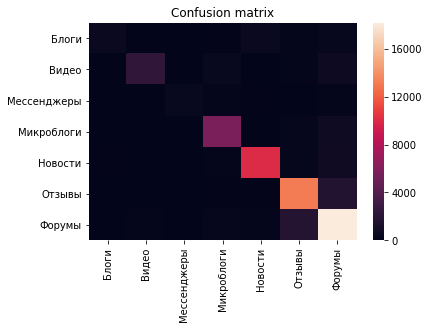

In [79]:
sns.heatmap(conf_matrix, xticklabels=clf.classes_, yticklabels=clf.classes_,)
plt.title('Confusion matrix')

In [80]:
conf_matrix

array([[  519,    65,    33,    73,   464,   154,   336],
       [    4,  2284,    12,   411,    21,   213,   618],
       [   11,    36,   403,   172,    74,    36,   181],
       [    0,    62,     3,  5626,     0,   260,   651],
       [  132,    62,    55,   186, 10078,   254,   735],
       [   20,    38,     4,    92,    77, 13165,  1654],
       [   33,   148,    21,   272,   180,  1759, 18184]])

Из этой диаграммы можно сделать вывод, что класс Блоги распознается хуже всего, чуть получше дела обстоят с классом Мессендеры, но все так же ужасно. Это и неудивительно, ведь эти оба класса вместе составляли лишь 5-6% всей выборки. Видео так же классифицируется посредственно, но заметно лучше, чем предыдущие два класса. Остальные же 4 класса предсказываютсся отлично.

## Часть 2. Логистическая регрессия.
[3 балла]

Для наших экспериентов возьмём обучающую выборку [отсюда](https://www.kaggle.com/iabhishekofficial/mobile-price-classification).

In [81]:
train = pd.read_csv('train.csv')

Решается задача многоклассовой классификации — определение ценовой категории телефона. Для простоты перейдём к задаче бинарной классификации — пусть исходные классы 0 и 1 соответствуют классу 0 новой целевой переменной, а остальные классу 1.
​
Замените целевую переменную, отделите её в отдельную переменную и удалите из исходной выборки.

In [82]:
train.shape

(2000, 21)

In [83]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [84]:
train.loc[train['price_range'] != 0] = 1

In [85]:
target = train['price_range']

In [86]:
train.drop(['price_range'], axis=1, inplace=True)

In [87]:
train.shape

(2000, 20)

Разделите выборку на обучающую и тестовую части в соотношении 7 к 3. Для этого можно использовать `train_test_split` из scikit-learn. Не забудьте зафиксировать сид для разбиения.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, 
                                                    random_state=2019)

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмода. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$

Не забывайте, что для линейных методов матрицу объекты-признаки необходимо предварительно нормировать (то есть привести каждый признак к одному и тому же масштабу одним из способов). Для этого можно воспользоваться `StandardScaler` или сделать это вручную.

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
std_scaler = StandardScaler()

In [91]:
train_scaled = std_scaler.fit_transform(X_train)
test_scaled = std_scaler.transform(X_test)

/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


Обучите логистическую регрессию. Сделайте предсказания для тестовой части, посчитайте по ним ROC-AUC и Accuracy (порог 0.5). Хорошо ли удаётся предсказывать целевую переменную?
Не забывайте, что метод predict_proba вычисляет вероятности обоих классов выборки, а в бинарной классификации нас интересует в первую очередь вероятность принадлежности к положительному классу.

In [92]:
clf = LogisticRegression(random_state=2019)
clf.fit(train_scaled, y_train)
pred = clf.predict(test_scaled)
accuracy_score(y_test, pred)

/home/neeveermoree/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

In [93]:
from sklearn.metrics import roc_auc_score

In [94]:
clf.predict_proba(test_scaled)[:, 1]

array([9.98703155e-01, 3.87571612e-06, 9.98703155e-01, 9.98703155e-01,
       9.98703155e-01, 8.83895193e-06, 9.98703155e-01, 9.98703155e-01,
       2.04254747e-06, 9.98703155e-01, 9.98703155e-01, 9.98703155e-01,
       9.98703155e-01, 9.98703155e-01, 1.05794977e-06, 9.98703155e-01,
       9.98703155e-01, 9.98703155e-01, 9.98703155e-01, 9.98703155e-01,
       1.13161434e-07, 9.98703155e-01, 9.98703155e-01, 9.98703155e-01,
       3.11733204e-07, 9.98703155e-01, 9.98703155e-01, 9.98703155e-01,
       9.98703155e-01, 9.98350545e-09, 9.98703155e-01, 9.98703155e-01,
       8.57697305e-10, 8.39265298e-08, 9.98703155e-01, 9.98703155e-01,
       9.98703155e-01, 9.98703155e-01, 9.98703155e-01, 1.27141644e-06,
       9.98703155e-01, 9.98703155e-01, 7.99080368e-06, 9.98703155e-01,
       9.98703155e-01, 9.98703155e-01, 9.98703155e-01, 9.98703155e-01,
       9.98703155e-01, 9.98703155e-01, 9.98703155e-01, 9.98703155e-01,
       9.98703155e-01, 9.98703155e-01, 4.12852444e-07, 9.98703155e-01,
      

In [95]:
roc_auc_score(y_test, clf.predict_proba(test_scaled)[:, 1])

1.0

Странно, но алгоритм работает вообще без единой ошибки)) Идеальная классификация (всегда бы так ^_^)

У обученной логистической регрессии есть два аттрибута: `coef_` и `intercept_`, которые соответствуют весам $w$ и $w_0$. Это и есть результат обучения логистической регрессии. Попробуйте с помощью них (с помощью всё той же обученной ранее логистической регрессии) посчитать "сырое" предсказание алгоритма $b(x)$. 

Постройте гистограмму полученных значений и ответьте на вопросы:
- Какие значения принимает такое предсказание?
- Похожи ли эти значения на вероятность классов?

In [96]:
b = np.dot(clf.coef_, test_scaled.T) + clf.intercept_

Text(0.5, 0, 'Value')

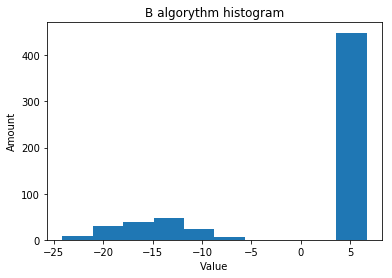

In [97]:
plt.hist(b.T)
plt.title('B algorythm histogram')
plt.ylabel('Amount')
plt.xlabel('Value')

Так как весь алгоритм b(x) - это по сути скалярное произведение признаков объекта на веса модели, то предсказание может принимать любые действительные значения 

Если смотреть только на значения предсказаний, то они не похожи на вероятность классов, зато видно как разделены объекты разных классов

Реализуйте сигмоиду и постройте её график. Что вы можете сказать об этой функции?

In [98]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Text(0.5, 0, 'X')

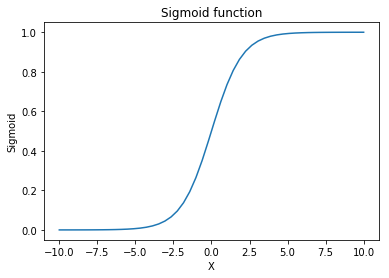

In [99]:
values = np.linspace(-10, 10)
sigm_values = sigmoid(values)
plt.plot(values, sigm_values)
plt.title('Sigmoid function')
plt.ylabel('Sigmoid')
plt.xlabel('X')

Примените реализованную сигмоиду к $b(x)$. Вы должны получить вероятности принадлежности к положительному классу. Проверьте, что ваши значения совпали с теми, которые получены с помощью `predict_proba`.

In [100]:
sigmoid_b = sigmoid(b)

In [101]:
(clf.predict_proba(test_scaled)[:, 1] == sigmoid_b).all()

True

Таким образом, обучение логистической регрессии — настройка параметров $w$ и $w_0$, а применение — подсчёт вероятностей принадлежности положительному классу как применение сигмоды к скалярному произведению признаков и параметров.

Постройте для обученной логистической регрессии ROC-кривую `roc_curve` и PR-кривую `precision_recall_curve`.

In [102]:
from sklearn.metrics import roc_curve, precision_recall_curve

In [103]:
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(test_scaled)[:, 1], pos_label=1)
pr, rec, _ = precision_recall_curve(y_test, clf.predict_proba(test_scaled)[:, 1])

Text(0.5, 1.0, 'Receiver operating characteristic')

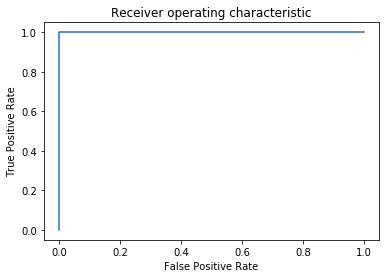

In [104]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

Text(0.5, 1.0, 'Precision-Recall Curve')

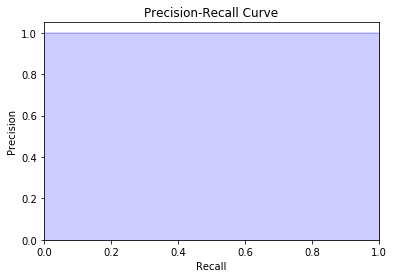

In [105]:
plt.step(rec, pr, color='b', alpha=0.2,
         where='post')
plt.fill_between(rec, pr, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')

### 4. Бонусное задание. Обучение логистической регрессии.

[2 бонусных балла]

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмода. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$



Если выше вручную мы только применяли логистическую регрессию, то здесь предлагается реализовать обучение с помощью полного градиентного спуска.
Если кратко, то обучение логистической регрессии с $L_2$-регуляризацией можно записать следующим образом:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} \log (1 + \exp(- y_i \langle w, x_i \rangle )) + \frac{\lambda_2}{2} \lVert w \rVert _2^2 \to \min_w
$$

Считаем, что $y_i \in \{-1, +1\}$, а нулевым признаком сделан единичный (то есть $w_0$ соответствует свободному члену). Искать $w$ будем с помощью градиентного спуска:

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla_w Q(w, X)
$$

В случае полного градиентного спуска $\nabla_w Q(w, X)$ считается напрямую (как есть, то есть, используя все объекты выборки). Длину шага $\alpha > 0$ в рамках данного задания предлагается брать равной некоторой малой константе.
Градиент по объекту $x_i$ считается по следующей формуле:

$$
\nabla_w Q(w, x_i) = - \frac{y_i x_i}{1 + \exp(y_i \langle w, x_i \rangle)} + \lambda_2 w
$$

На самом деле неправильно регуляризировать свободный член $w_0$ (то есть при добавлении градиента для $w_0$ не надо учитывать слагаемое с $\lambda_2$). Но в рамках этого задания мы не обращаем на это внимания и работаем со всеми вектором весов одинаково.

В качестве критерия останова необходимо использовать (одновременно):

- проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) — параметр tolerance
- достижение максимального числа итераций (например, 10000) — параметр max_iter.

Инициализировать веса можно случайным образом или нулевым вектором.

Реализуйте обучение логистической регрессии. Для удобства ниже предоставлен прототип с необходимыми методами. В loss_history необходимо сохранять вычисленное на каждой итерации значение функции потерь.

In [106]:
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, lambda_2=1.0, tolerance=1e-4, max_iter=1000, alpha=1e-3):
        """
        lambda_2: L2 regularization param
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        alpha: learning rate
        """
        self.lambda_2 = lambda_2
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.alpha = alpha
        self.w = None
        self.loss_history = None
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        np.random.seed(2017)
        self.loss_history = []
        
        shape = X.shape
        ones = np.ones((shape[0], 1))
        X = np.append(ones, X, axis=1)
        
        self.w = np.random.rand(shape[1]+1)
        
        epoch = 0
        distance = np.ones(1)
        
        while epoch < self.max_iter and distance > self.tolerance:
            previous_weights = self.w.copy()
            self.calc_loss(X, y)
            gradient = self.calc_gradient(X, y)
            self.w = self.w - self.alpha * gradient
            distance = np.abs(np.linalg.norm(self.w-previous_weights))
            epoch += 1
        
        return self
    
    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """
        if self.w is None:
            raise Exception('Not trained yet')
        
        shape = X.shape
        ones = np.ones((shape[0], 1))
        X = np.append(ones, X, axis=1)
        
        dot_product = np.dot(X, self.w)
        sigmoid = 1 / (1 + np.exp(-dot_product))

        return np.append(1-sigmoid.reshape(X.shape[0], 1), sigmoid.reshape(X.shape[0], 1), axis=1)
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        dot_product = np.dot(X, self.w)
        zn = (1 + np.exp(np.dot(dot_product, y)))
        dl = np.dot(X.T, y)
        return -(dl / zn.T).T + self.lambda_2 * self.w

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        dot_product = np.dot(X, self.w)
        log = np.log(1 + np.exp(-y * dot_product))
        loss = np.sum(log) / log.shape[0] + self.lambda_2 / 2 * np.dot(self.w.T, self.w)
        self.loss_history.append(loss)

- Примените логистическую регресиию на той же выборке.
- Посчитайте качество по тем же метрикам.
- Визуализируйте изменение значений функции потерь от номера итераций.

In [107]:
log = LogReg()
log.fit(train_scaled, y_train.values)

LogReg(alpha=0.001, lambda_2=1.0, max_iter=1000, tolerance=0.0001)

In [108]:
log.loss_history[-1]

0.8273214778273074

In [109]:
ans = log.predict_proba(test_scaled)
ans[:10]

array([[0.21256617, 0.78743383],
       [0.90153744, 0.09846256],
       [0.21256617, 0.78743383],
       [0.21256617, 0.78743383],
       [0.21256617, 0.78743383],
       [0.87375956, 0.12624044],
       [0.21256617, 0.78743383],
       [0.21256617, 0.78743383],
       [0.89731977, 0.10268023],
       [0.21256617, 0.78743383]])

In [110]:
clf.predict_proba(test_scaled)

array([[1.29684486e-03, 9.98703155e-01],
       [9.99996124e-01, 3.87571612e-06],
       [1.29684486e-03, 9.98703155e-01],
       ...,
       [1.29684486e-03, 9.98703155e-01],
       [1.29684486e-03, 9.98703155e-01],
       [1.29684486e-03, 9.98703155e-01]])

In [111]:
binary = ans[:, 1]
binary[binary > 0.5] = 1
binary[binary <= 0.5 ] = 0

In [112]:
accuracy_score(y_test, binary)

0.9933333333333333

In [113]:
accuracy_score(y_test, clf.predict(test_scaled))

1.0

In [114]:
roc_auc_score(y_test, ans[:, 1])

0.9867549668874172

In [115]:
roc_auc_score(y_test, clf.predict_proba(test_scaled)[:, 1])

1.0

Text(0.5, 0, 'Number of epochs')

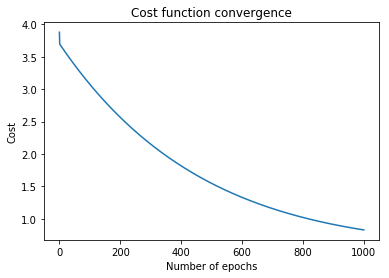

In [116]:
x = np.linspace(0, len(log.loss_history), len(log.loss_history))
plt.plot(x, log.loss_history)
plt.title('Cost function convergence')
plt.ylabel('Cost')
plt.xlabel('Number of epochs')

### 5. Бонусное задание 2. 

[0.002 бонусных балла]

Напишите свой любимый текстовый (у нас же домашнее задание про тексты, ощущаете иронию) мем или анекдот

### I lov mem so thi is th way to go

<img src="meme.jpg">